# Power

## 10, 10, 1

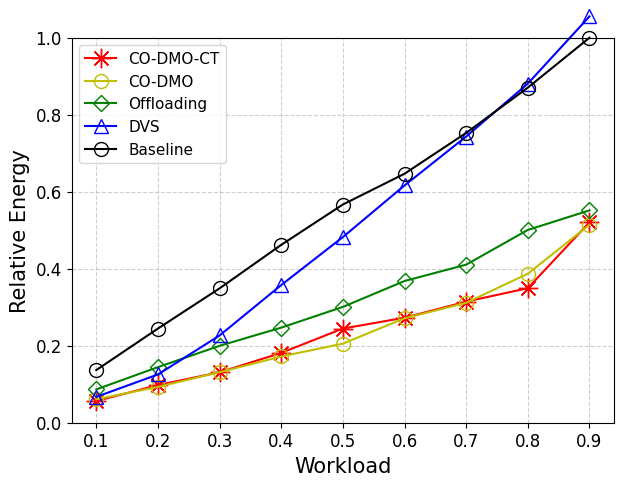

In [6]:
import matplotlib.pyplot as plt

# 파일 경로
#file_path = "./result_100_100_4.txt"
file_path = "../simulators/tmp/result_10_10_3.txt"

energy_data = {
    "Baseline": {},
    "DVFS": {},
    "Offloading": {},
    "CO-DMO": {},
    "CO-DMO-CT": {}
}

with open(file_path, "r") as file:
    lines = file.readlines()
    for line in lines[1:]:
        values = line.strip().split(' ')
        try:
            workload = float(values[0])
            method = values[1]
            energy = float(values[2])  # Power 열
        except ValueError:
            continue

        if method == "Baseline":
            energy_data["Baseline"][workload] = energy
        elif method in ["DVFS", "DVS"]:  # 여기 수정
            energy_data["DVFS"][workload] = energy
        elif method == "Offloading":
            energy_data["Offloading"][workload] = energy
        elif method == "CO-DMO":
            energy_data["CO-DMO"][workload] = energy
        elif method == "CO-DMO-CT":
            energy_data["CO-DMO-CT"][workload] = energy

workloads = sorted(energy_data["Baseline"].keys())
max_energy = max(energy_data["Baseline"].values())
for method in energy_data:
    energy_data[method] = {w: e / max_energy for w, e in energy_data[method].items()}

plt.figure(figsize=(7, 5))
plt.plot(workloads, [energy_data["CO-DMO-CT"][w] for w in workloads], marker=(8, 2, 0), color='r', label="CO-DMO-CT", markersize=14, clip_on=False)
plt.plot(workloads, [energy_data["CO-DMO"][w] for w in workloads], 'yo-', label="CO-DMO", markersize=10, markerfacecolor='none', clip_on=False)
plt.plot(workloads, [energy_data["Offloading"][w] for w in workloads], 'gD-', label="Offloading", markersize=8, markerfacecolor='none', clip_on=False)
plt.plot(workloads, [energy_data["DVFS"][w] for w in workloads], 'b^-', label="DVS", markersize=10, markerfacecolor='none', clip_on=False)
plt.plot(workloads, [energy_data["Baseline"][w] for w in workloads], 'ko-', label="Baseline", markersize=10, markerfacecolor='none', clip_on=False)

plt.xlabel("Workload", fontsize=15)
plt.ylabel("Relative Energy", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.show()


## 10, 10, 1/2

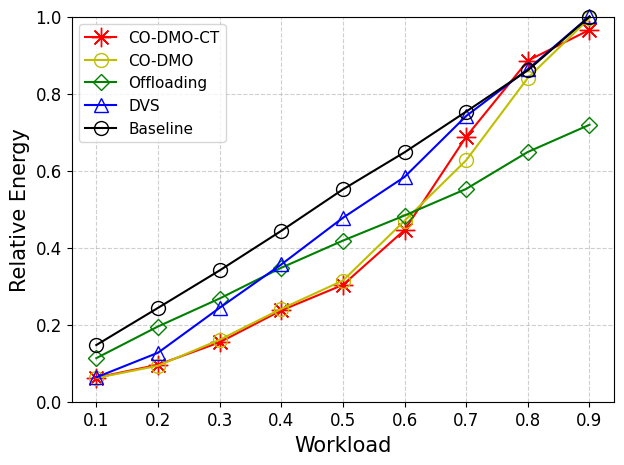

In [7]:
import matplotlib.pyplot as plt

# 파일 경로
#file_path = "./result_10_10_4.txt"
file_path = "../simulators/tmp/result_10_10_3.txt"
energy_data = {
    "Baseline": {},
    "DVFS": {},
    "Offloading": {},
    "CO-DMO": {},
    "CO-DMO-CT": {}
}

with open(file_path, "r") as file:
    lines = file.readlines()
    for line in lines[1:]:
        values = line.strip().split(' ')
        try:
            workload = float(values[0])
            method = values[1]
            energy = float(values[2])  # Power 열
        except ValueError:
            continue

        if method == "Baseline":
            energy_data["Baseline"][workload] = energy
        elif method in ["DVFS", "DVS"]:  # 여기 수정
            energy_data["DVFS"][workload] = energy
        elif method == "Offloading":
            energy_data["Offloading"][workload] = energy
        elif method == "CO-DMO":
            energy_data["CO-DMO"][workload] = energy
        elif method == "CO-DMO-CT":
            energy_data["CO-DMO-CT"][workload] = energy

workloads = sorted(energy_data["Baseline"].keys())
max_energy = max(energy_data["Baseline"].values())
for method in energy_data:
    energy_data[method] = {w: e / max_energy for w, e in energy_data[method].items()}

plt.figure(figsize=(7, 5))
plt.plot(workloads, [energy_data["CO-DMO-CT"][w] for w in workloads], marker=(8, 2, 0), color='r', label="CO-DMO-CT", markersize=14, clip_on=False)
plt.plot(workloads, [energy_data["CO-DMO"][w] for w in workloads], 'yo-', label="CO-DMO", markersize=10, markerfacecolor='none', clip_on=False)
plt.plot(workloads, [energy_data["Offloading"][w] for w in workloads], 'gD-', label="Offloading", markersize=8, markerfacecolor='none', clip_on=False)
plt.plot(workloads, [energy_data["DVFS"][w] for w in workloads], 'b^-', label="DVS", markersize=10, markerfacecolor='none', clip_on=False)
plt.plot(workloads, [energy_data["Baseline"][w] for w in workloads], 'ko-', label="Baseline", markersize=10, markerfacecolor='none', clip_on=False)

plt.xlabel("Workload", fontsize=15)
plt.ylabel("Relative Energy", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.show()


# Util

## 10, 10, 1

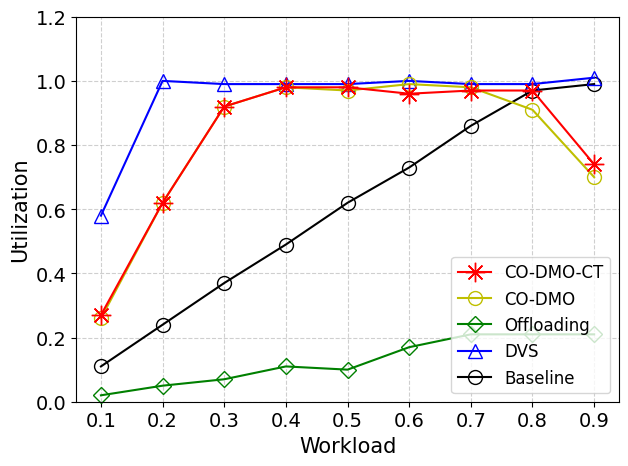

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 공백(스페이스/탭) 구분 파일 읽기
#file_path = "./result_100_100_4.txt"
file_path = "../simulators/tmp/result_10_10_3.txt"
df = pd.read_csv(file_path, sep=r"\s+", engine="python")

# 필요 컬럼이 모두 있는지 확인(없으면 에러)
required_cols = ["Workload", "Section", "Util"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"필수 컬럼 없음: {missing}")

# Workload 정렬
workloads = sorted(df["Workload"].unique())

# 섹션 이름: 파일은 'DVS'를 사용
methods = ["Baseline", "DVS", "Offloading", "CO-DMO", "CO-DMO-CT"]
legend_labels = {
    "Baseline": "Baseline",
    "DVS": "DVS",
    "Offloading": "Offloading",
    "CO-DMO": "CO-DMO",
    "CO-DMO-CT": "CO-DMO-CT",
}

# 스타일 (에너지 그래프와 동일)
colors = {
    "Baseline": "k",
    "DVS": "b",
    "Offloading": "g",
    "CO-DMO": "y",
    "CO-DMO-CT": "r",
}
markers = {
    "Baseline": "o",
    "DVS": "^",
    "Offloading": "D",
    "CO-DMO": "o",
    "CO-DMO-CT": (8, 2, 0),   # 8-point star-like marker
}
marker_sizes = {
    "Baseline": 10,
    "DVS": 10,
    "Offloading": 8,
    "CO-DMO": 10,
    "CO-DMO-CT": 14,
}

plt.figure(figsize=(7, 5))

for method in methods:
    df_m = df[df["Section"] == method]
    util = (
        df_m.groupby("Workload")["Util"]
        .mean()
        .reindex(workloads, fill_value=0.0)
        .astype(float)
    )
    x = np.array(workloads, dtype=float)

    if method == "CO-DMO-CT":
        plt.plot(
            x, util.values,
            marker=markers[method], color=colors[method],
            label=legend_labels[method],
            markersize=marker_sizes[method], clip_on=False
        )
    elif method == "CO-DMO":
        plt.plot(
            x, util.values,
            "yo-", label=legend_labels[method],
            markersize=marker_sizes[method], markerfacecolor="none",
            clip_on=False
        )
    elif method == "Offloading":
        plt.plot(
            x, util.values,
            "gD-", label=legend_labels[method],
            markersize=marker_sizes[method], markerfacecolor="none",
            clip_on=False
        )
    elif method == "DVS":
        plt.plot(
            x, util.values,
            "b^-", label=legend_labels[method],
            markersize=marker_sizes[method], markerfacecolor="none",
            clip_on=False
        )
    elif method == "Baseline":
        plt.plot(
            x, util.values,
            "ko-", label=legend_labels[method],
            markersize=marker_sizes[method], markerfacecolor="none",
            clip_on=False
        )

plt.xlabel("Workload", fontsize=15)
plt.ylabel("Utilization", fontsize=15)
plt.xticks(workloads, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 1.2)
plt.grid(True, linestyle="--", alpha=0.6)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], fontsize=12)  # 역순 정렬
plt.show()


## 10, 10, 1/2

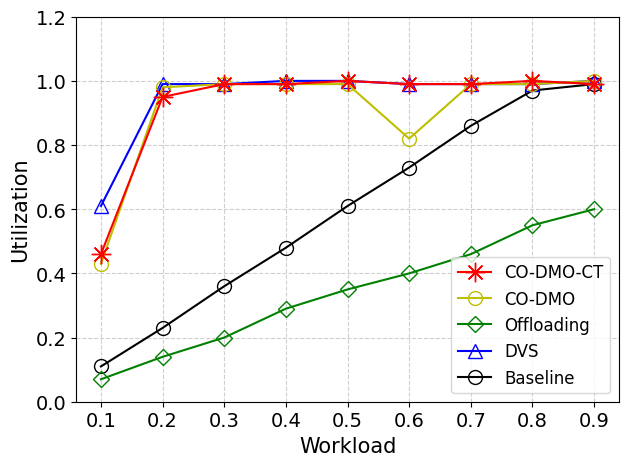

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 공백(스페이스/탭) 구분 파일 읽기
#file_path = "./result_10_10_4.txt"
file_path = "../simulators/tmp/result_10_10_3.txt"
df = pd.read_csv(file_path, sep=r"\s+", engine="python")

# 필요 컬럼이 모두 있는지 확인(없으면 에러)
required_cols = ["Workload", "Section", "Util"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"필수 컬럼 없음: {missing}")

# Workload 정렬
workloads = sorted(df["Workload"].unique())

# 섹션 이름: 파일은 'DVS'를 사용
methods = ["Baseline", "DVS", "Offloading", "CO-DMO", "CO-DMO-CT"]
legend_labels = {
    "Baseline": "Baseline",
    "DVS": "DVS",
    "Offloading": "Offloading",
    "CO-DMO": "CO-DMO",
    "CO-DMO-CT": "CO-DMO-CT",
}

# 스타일 (에너지 그래프와 동일)
colors = {
    "Baseline": "k",
    "DVS": "b",
    "Offloading": "g",
    "CO-DMO": "y",
    "CO-DMO-CT": "r",
}
markers = {
    "Baseline": "o",
    "DVS": "^",
    "Offloading": "D",
    "CO-DMO": "o",
    "CO-DMO-CT": (8, 2, 0),   # 8-point star-like marker
}
marker_sizes = {
    "Baseline": 10,
    "DVS": 10,
    "Offloading": 8,
    "CO-DMO": 10,
    "CO-DMO-CT": 14,
}

plt.figure(figsize=(7, 5))

for method in methods:
    df_m = df[df["Section"] == method]
    util = (
        df_m.groupby("Workload")["Util"]
        .mean()
        .reindex(workloads, fill_value=0.0)
        .astype(float)
    )
    x = np.array(workloads, dtype=float)

    if method == "CO-DMO-CT":
        plt.plot(
            x, util.values,
            marker=markers[method], color=colors[method],
            label=legend_labels[method],
            markersize=marker_sizes[method], clip_on=False
        )
    elif method == "CO-DMO":
        plt.plot(
            x, util.values,
            "yo-", label=legend_labels[method],
            markersize=marker_sizes[method], markerfacecolor="none",
            clip_on=False
        )
    elif method == "Offloading":
        plt.plot(
            x, util.values,
            "gD-", label=legend_labels[method],
            markersize=marker_sizes[method], markerfacecolor="none",
            clip_on=False
        )
    elif method == "DVS":
        plt.plot(
            x, util.values,
            "b^-", label=legend_labels[method],
            markersize=marker_sizes[method], markerfacecolor="none",
            clip_on=False
        )
    elif method == "Baseline":
        plt.plot(
            x, util.values,
            "ko-", label=legend_labels[method],
            markersize=marker_sizes[method], markerfacecolor="none",
            clip_on=False
        )

plt.xlabel("Workload", fontsize=15)
plt.ylabel("Utilization", fontsize=15)
plt.xticks(workloads, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 1.2)
plt.grid(True, linestyle="--", alpha=0.6)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], fontsize=12)  # 역순 정렬
plt.show()
